<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/31_choropleth_map_h3_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install pyogrio h3pandas contextily

In [2]:
import contextily as cx
import geopandas as gpd
import h3pandas
import matplotlib.pyplot as plt
import pooch

In [3]:
anb_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/vector/geonb_anb_shp.zip',
    known_hash='67de38f5edb30f2578aef2a64f10a0a7cc7a8a1b77d680e34936574e35528f26'
)

In [4]:
anb = gpd.read_file(
    anb_file,
    engine='pyogrio',
    use_arrow=True,
    layer='geonb_anb_addresses'
)

anb.shape

(383757, 29)

In [5]:
h3_anb = (
    anb
    .to_crs('EPSG:4326')[['geometry']]
    .assign(val=1)
    .h3.geo_to_h3_aggregate(resolution=5, operation='count')
    .to_crs('EPSG:2953')
)

h3_anb.shape

(278, 2)

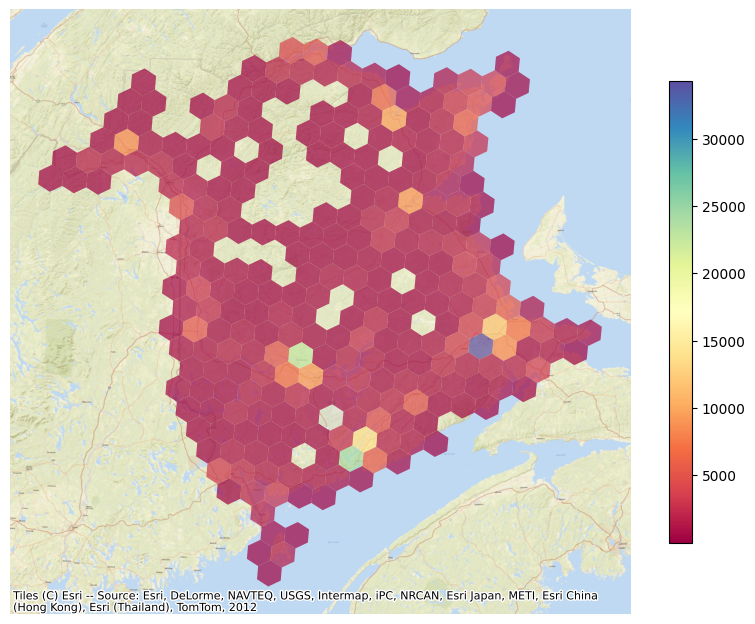

In [6]:
ax = h3_anb.plot(
    column='val',
    figsize=(10, 10),
    cmap='Spectral',
    alpha=0.7,
    legend=True,
    legend_kwds={'shrink': 0.6}
)
cx.add_basemap(ax, crs=h3_anb.crs, source=cx.providers.Esri.WorldStreetMap, zoom=10)
plt.axis('off')
plt.savefig('H3 - Choropleth Map - Civic Address.png', dpi=600, bbox_inches='tight')